In [1]:
import test_models
import pandas as pd
import dataframe_image as dfi
import importlib

importlib.reload(test_models)

data = []
items = ['tables','chairs', 'octopus', 'spiders']
all_scores = []
for k in [0, 1, 2, 3]:
    for ff in ['Projection', 'PCA']:
        for co in ['CubicalCover4-0.1', 'CubicalCover3-0.15']:
            for cl in ['DBSCAN10']:
                print("\nStart computing model accuracy... ")
                scores, scores_wo_homology, majority_classifier = test_models.model_accuracy(k, filter_func=ff, cover=co, clusterer=cl)
                res_w_homology = [x[:2] for x in scores[:3]]
                [all_scores.append((scores[i], (items[k], ff, co, cl))) for i in range(len(scores))]
                res_wo_homology = [x[:2] for x in scores_wo_homology[:3]]
                [all_scores.append((scores_wo_homology[i], (items[k], ff, co, cl))) for i in range(len(scores_wo_homology))]
                res_wo_h = [x[:2] for x in scores_wo_homology if x[1] == res_w_homology[0][1][:-2]] if len(res_w_homology[0][1]) > 2 else [None]
                res_h = [x[:2] for x in scores if x[1] == "h"+res_w_homology[0][1][-1]]
                print(res_w_homology[0][1][:-2], res_wo_h, res_w_homology[0][1][-2:], res_h)
                data.append([items[k], ff, co, cl, res_w_homology[0], res_h[0], res_wo_h[0], majority_classifier])
                print(items[k], ff, co, cl)
                print(res_w_homology[:3], res_wo_homology[0], majority_classifier)

table = pd.DataFrame(data, range(len(data)), ["items", "filter function", "cover", "clusterer", "accuracy scores w homology", "accuracy scores homology", "accuracy score wo homology", "majority classifier"])
dfi.export(table,"data/testResults/mytable.png")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.

Start computing model accuracy... 
- processing data
- computing feature vectors
 99%
- calculating accuracy scores
 h3 h3 [(0.7527272727272727, 'h3')]
octopus PCA CubicalCover4-0.15 DBSCAN10
[(0.7527272727272727, 'h3'), (0.7527272727272727, 'h2'), (0.7527272727272727, 'h1')] (0.7527272727272727, '9 12 ') 0.7524752475247525


((0.7527272727272727, '0 ', array([[76,  0],
       [25,  0]], dtype=int64)), ('octopus', 'PCA', 'CubicalCover4-0.15', 'DBSCAN10'))


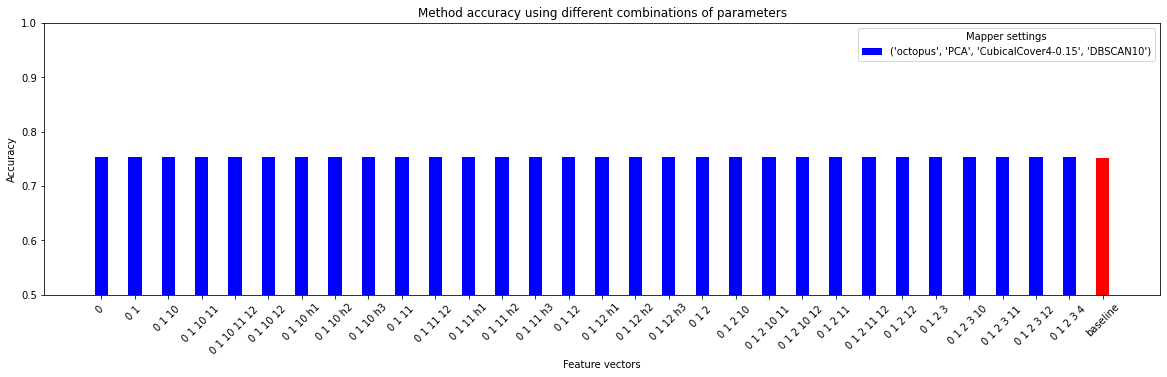

In [14]:
import test_models
import importlib
importlib.reload(test_models)

scores = all_scores.copy()
scores.sort()
test_models.visualize_scores(scores[:30], majority_classifier)